In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("/kaggle/input/iris-dataset-extended/iris_extended.csv")

In [3]:
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
elevation,1200.0,173.543917,72.461258,50.100000,110.875000,171.300000,239.125000,299.900000
sepal_length,1200.0,5.895900,0.845579,4.040000,5.210000,5.840000,6.520000,9.120000
sepal_width,1200.0,3.052858,0.527120,1.700000,2.690000,3.030000,3.390000,4.760000
petal_length,1200.0,3.807950,1.765469,0.960000,1.640000,4.300000,5.200000,7.840000
petal_width,1200.0,1.189542,0.728882,0.050000,0.360000,1.290000,1.740000,2.990000
sepal_area,1200.0,17.870807,3.388978,9.048000,15.554550,17.646400,20.007275,29.722600
petal_area,1200.0,5.689068,4.585312,0.086000,0.565825,5.525400,9.256725,23.128000
sepal_aspect_ratio,1200.0,2.003853,0.507508,0.978774,1.639104,1.970738,2.293932,4.082902
petal_aspect_ratio,1200.0,4.016732,2.070668,1.587379,2.855016,3.448642,4.486058,34.400000
sepal_to_petal_length_ratio,1200.0,1.996762,1.035622,0.745902,1.223277,1.442773,3.059940,5.410000


In [5]:
df.isnull().sum()

species                            0
elevation                          0
soil_type                          0
sepal_length                       0
sepal_width                        0
petal_length                       0
petal_width                        0
sepal_area                         0
petal_area                         0
sepal_aspect_ratio                 0
petal_aspect_ratio                 0
sepal_to_petal_length_ratio        0
sepal_to_petal_width_ratio         0
sepal_petal_length_diff            0
sepal_petal_width_diff             0
petal_curvature_mm                 0
petal_texture_trichomes_per_mm2    0
leaf_area_cm2                      0
sepal_area_sqrt                    0
petal_area_sqrt                    0
area_ratios                        0
dtype: int64

In [6]:
df.dtypes

species                             object
elevation                          float64
soil_type                           object
sepal_length                       float64
sepal_width                        float64
petal_length                       float64
petal_width                        float64
sepal_area                         float64
petal_area                         float64
sepal_aspect_ratio                 float64
petal_aspect_ratio                 float64
sepal_to_petal_length_ratio        float64
sepal_to_petal_width_ratio         float64
sepal_petal_length_diff            float64
sepal_petal_width_diff             float64
petal_curvature_mm                 float64
petal_texture_trichomes_per_mm2    float64
leaf_area_cm2                      float64
sepal_area_sqrt                    float64
petal_area_sqrt                    float64
area_ratios                        float64
dtype: object

In [7]:
px.imshow(df.select_dtypes(include=['int', 'float']).corr(), text_auto=True,)

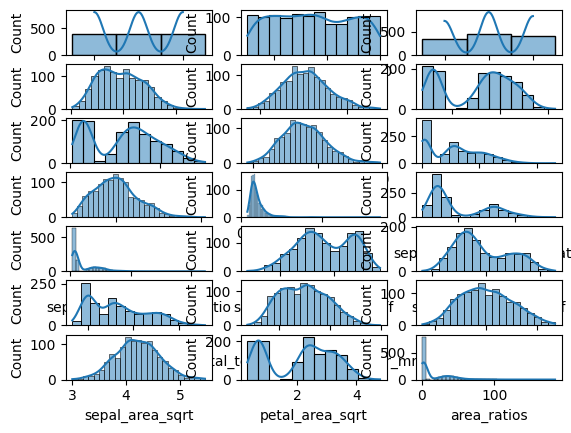

In [8]:
for i, column in enumerate(df.columns, 1):
    plt.subplot(7, 3, i)
    sns.histplot(df[column], kde=True)
    plt.tight_layout

In [9]:
for i, column in enumerate(df.select_dtypes(include=['int', 'float']).columns, 1):
    fig = px.box(df[column])
    fig.show()

In [10]:
scaler = RobustScaler()
for i, column in enumerate(df.select_dtypes(include=['int', 'float']).columns, 1):
    df[column] = scaler.fit_transform(df[column].values.reshape(-1, 1))

In [11]:
df = pd.concat([df.drop('soil_type', axis=1), pd.get_dummies(df['soil_type'])], axis=1)

In [12]:
df

,species,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,...,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,clay,loamy,sandy
0,setosa,-0.074074,-0.519084,0.542857,-0.747191,-0.746377,-0.011409,-0.586706,-0.698720,1.752898,...,0.945455,-0.480111,0.456709,-0.397267,-0.011438,-0.741232,1.328479,False,False,True
1,setosa,0.936452,-0.274809,1.457143,-0.778090,-0.666667,1.021307,-0.570631,-0.943227,0.420892,...,1.266667,-0.374653,0.749224,-0.442593,0.964587,-0.697830,1.256837,True,False,False
2,setosa,-0.210526,-0.564885,-0.328571,-0.794944,-0.659420,-0.756031,-0.571494,-0.228013,0.257369,...,0.503030,-0.419056,1.324595,-0.594568,-0.797456,-0.700013,0.782513,False,False,True
3,setosa,-0.442105,-0.916031,0.585714,-0.778090,-0.811594,-0.378375,-0.605841,-0.949716,3.403564,...,1.018182,-0.631822,1.088651,-0.554574,-0.388574,-0.803667,2.027444,True,False,False
4,setosa,-0.470955,-0.755725,-0.228571,-0.862360,-0.746377,-0.836993,-0.598971,-0.428879,0.786078,...,0.618182,-0.720629,0.902380,-1.239793,-0.888197,-0.779430,1.407069,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,virginica,0.760234,-0.366412,-0.742857,0.241573,0.463768,-0.941626,0.510120,0.251548,-0.475197,...,-0.612121,0.681776,-0.482925,0.019330,-1.007227,0.351548,-0.059407,False,True,False
1196,virginica,-0.357895,1.259542,0.042857,0.949438,0.637681,1.184219,1.281824,0.728397,0.055504,...,-0.424242,1.096207,-1.107968,1.196467,1.108947,0.756126,-0.058561,True,False,False
1197,virginica,-0.761793,0.725191,0.314286,0.117978,0.702899,0.992898,0.591630,0.180953,-0.833912,...,-0.363636,0.962997,-0.808555,1.014498,0.939172,0.399713,-0.034448,True,False,False
1198,virginica,0.532554,0.412214,-1.128571,0.280899,0.304348,-0.753516,0.407046,1.340011,-0.214112,...,-0.642424,0.570768,-1.181097,0.981836,-0.794655,0.288116,-0.051550,False,False,True


In [13]:
y = df['species']
X = df.drop('species', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
}
model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=6)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=6,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'n_estimators': [50, 100, 200, 400]})

In [16]:
print(f'Best params for RandomForestClassifier model: {grid_search.best_params_}')
print(f'Score: {grid_search.best_score_}')

Best params for RandomForestClassifier model: {'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}
Score: 0.9887810559006212


In [17]:
feature_importances = grid_search.best_estimator_.feature_importances_
print("Feature Importances:")
for feature, importance in zip(df.columns, feature_importances):
    print(f"{feature}: {importance}")

Feature Importances:
species: 0.002106673037255075
elevation: 0.01012743037429852
sepal_length: 0.0029200346784198695
sepal_width: 0.09931821487281955
petal_length: 0.06638475260059362
petal_width: 0.005177673190293187
sepal_area: 0.14837865994166285
petal_area: 0.005579937717511583
sepal_aspect_ratio: 0.002276264531485222
petal_aspect_ratio: 0.0761246433927293
sepal_to_petal_length_ratio: 0.09167211565374644
sepal_to_petal_width_ratio: 0.029891522912054918
sepal_petal_length_diff: 0.01567722928487805
sepal_petal_width_diff: 0.0993785405110373
petal_curvature_mm: 0.09952393948762411
petal_texture_trichomes_per_mm2: 0.02187795296251586
leaf_area_cm2: 0.0027074817885090396
sepal_area_sqrt: 0.1263624589283354
petal_area_sqrt: 0.09213955126510813
area_ratios: 0.001041757569474362
clay: 0.0004134601320179778
loamy: 0.0009197051676298402


In [18]:
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
scores = cross_val_score(model, df.drop(['species'], axis=1), df['species'], cv=10, scoring='accuracy')
print('Scores:', scores)
print('Accuracy:', scores.mean())
print('STD:', scores.std())
print('Classification report:')
print(classification_report(y_test, y_pred))

Scores: [1.         0.96666667 1.         1.         0.99166667 0.91666667
 1.         0.99166667 0.99166667 0.99166667]
Accuracy: 0.9850000000000001
STD: 0.02466441431158125
Classification report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00       137
  versicolor       0.99      0.97      0.98       128
   virginica       0.97      0.99      0.98       131

    accuracy                           0.99       396
   macro avg       0.99      0.99      0.99       396
weighted avg       0.99      0.99      0.99       396

